# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = get_dataset("data/waymo/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 77
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    name = batch['filename'].numpy()
    img = batch['image'].numpy()
    img_shape = img.shape
    bboxes   = batch['groundtruth_boxes'].numpy()
    classes = batch['groundtruth_classes'].numpy()
    colormap = {1: [1, 0, 0], 2: [0, 0, 1], 4: [0, 1, 0]} # map classes to different colors
    fig, ax = plt.subplots(1, figsize=(20, 10)) # create plot of 1 image
    ax.imshow(img)
    # iterate through boxes and classes and add them to the image
    for cl, box in zip(classes, bboxes):
            y1, x1, y2, x2 = box
            y1 = y1*img_shape[0]
            x1 = x1*img_shape[1]
            y2 = y2*img_shape[0]
            x2 = x2*img_shape[1]
            rect = Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor=colormap[cl], facecolor='none')
            ax.add_patch(rect)
            ax.set_title(name)
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax.set_ylabel('Height')
            ax.set_xlabel('Width')
    plt.show()
    

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

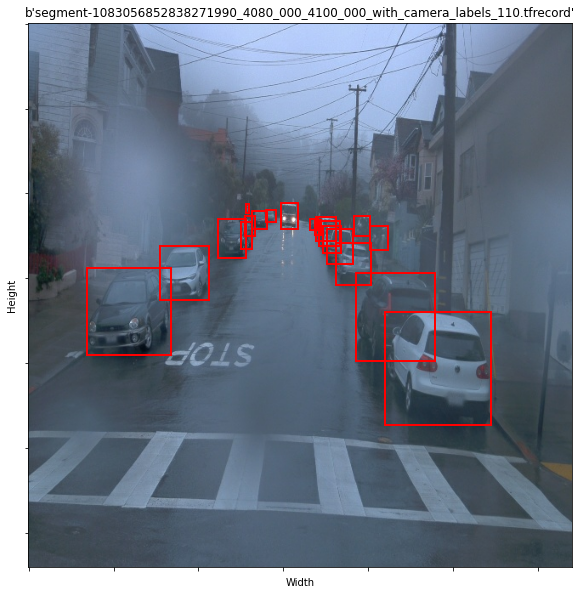

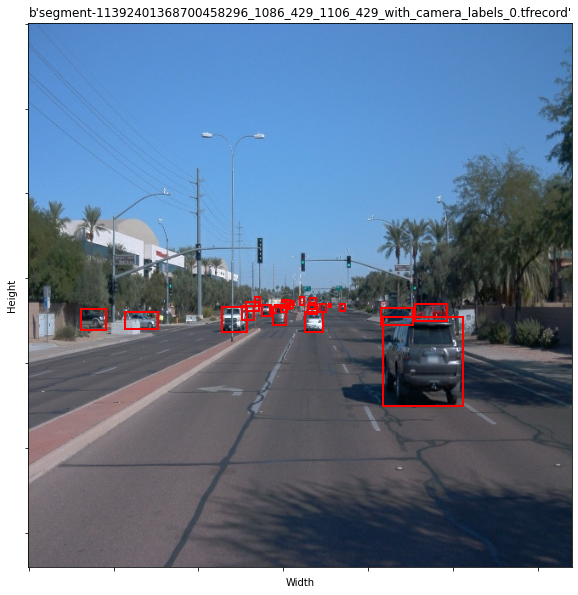

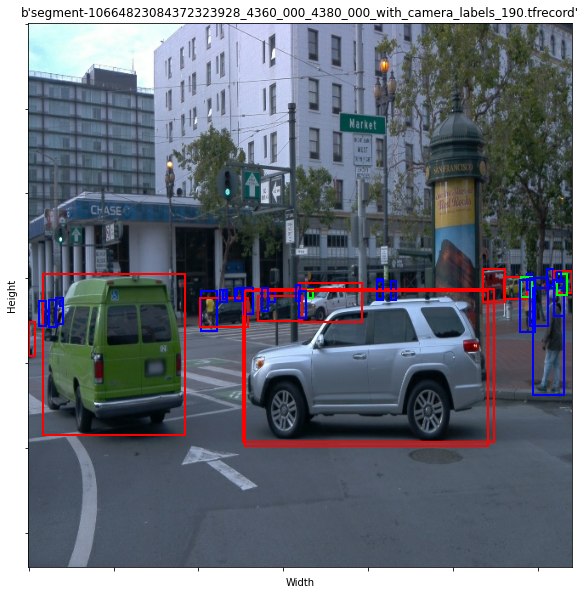

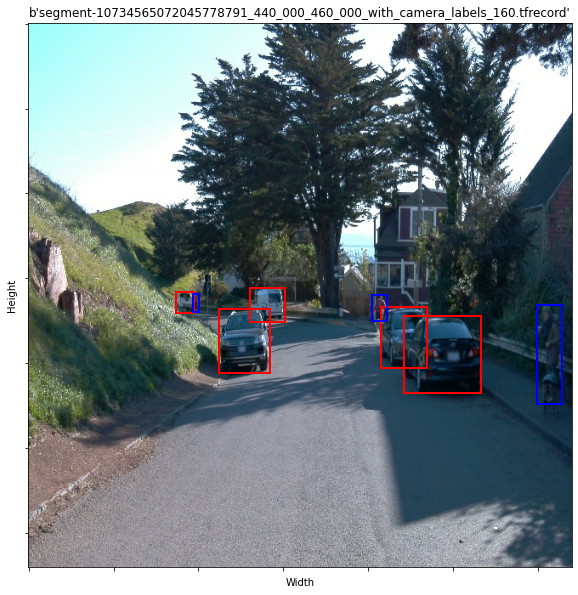

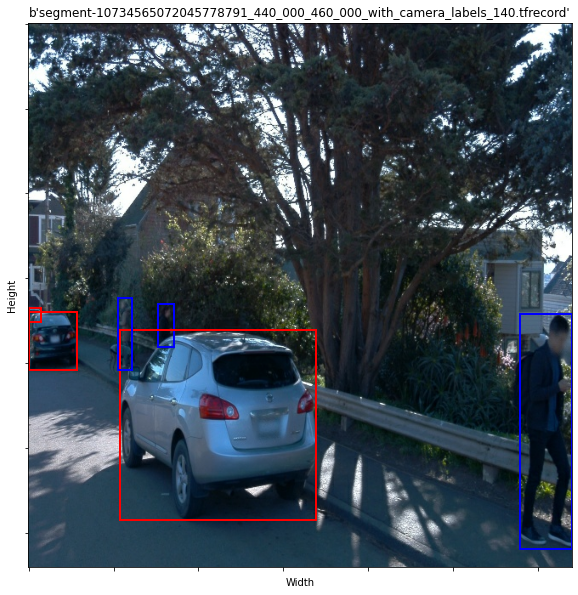

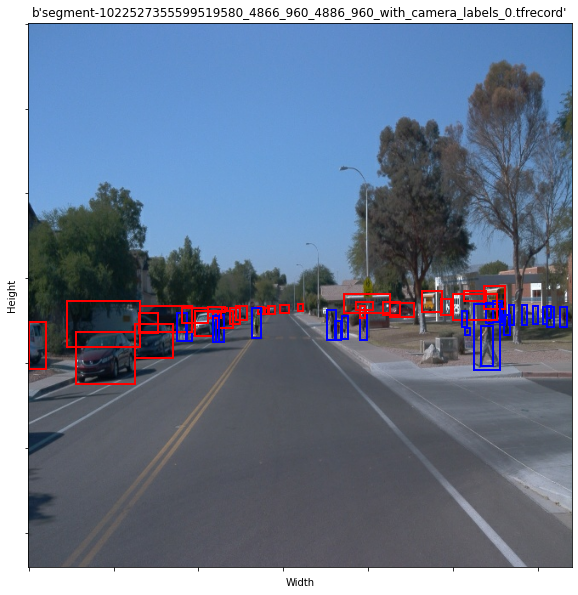

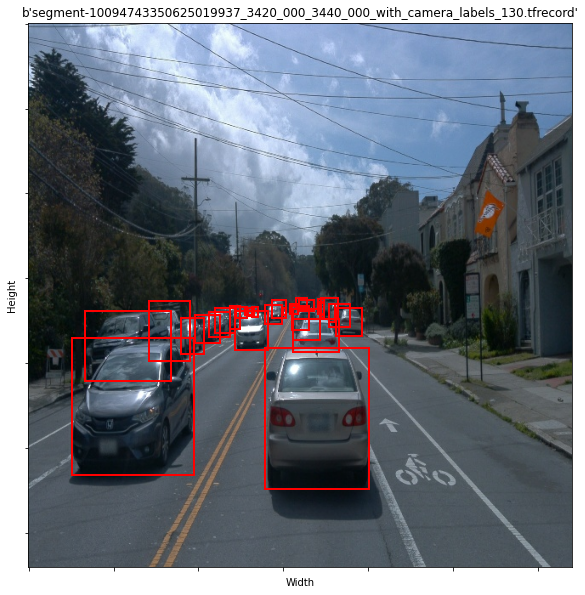

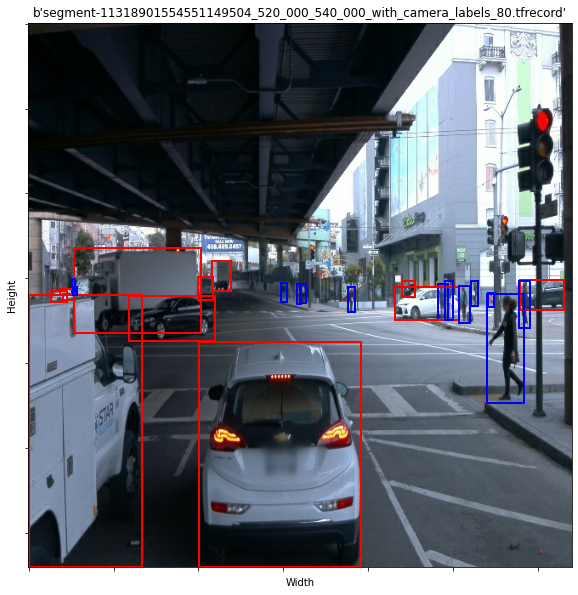

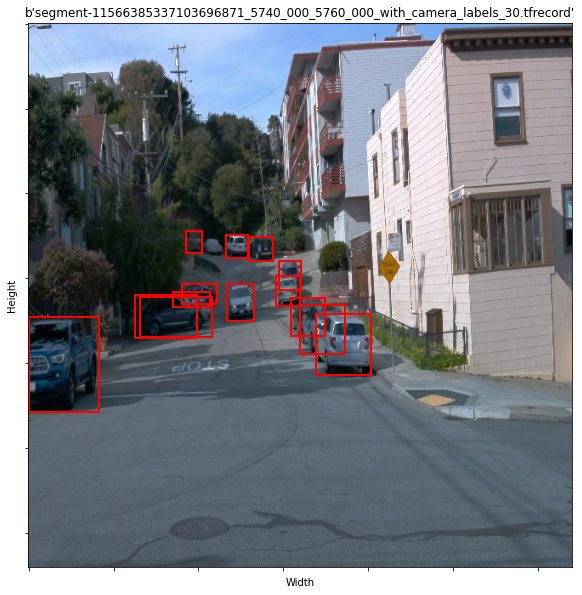

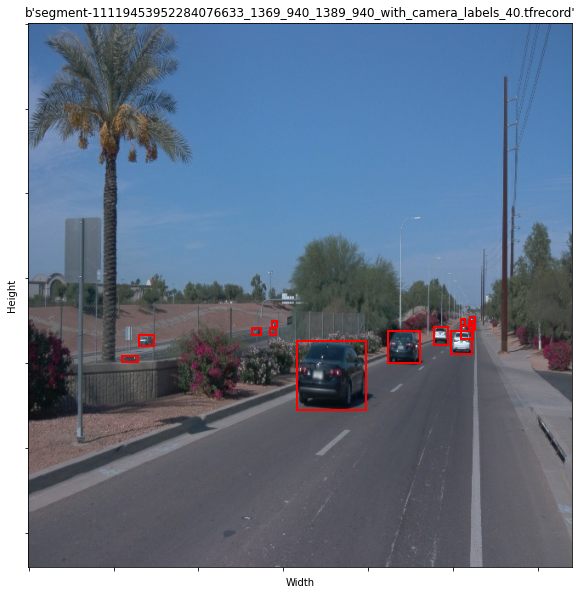

In [4]:
## main
for batches in dataset.take(10):
    display_instances(batches)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

[Text(0.5, 0, 'Class'),
 Text(0, 0.5, 'Number of Occurancies'),
 Text(0.5, 1.0, 'Histogram of Object Classes')]

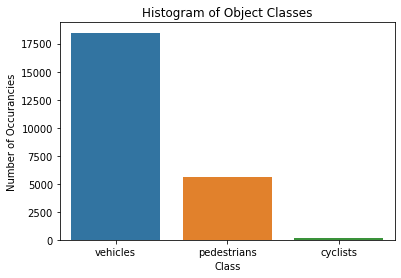

In [35]:
# uncomment the following if seaborn is not installed
#import pip
#pip.main(['install','seaborn'])
import seaborn as sns

# count individual classes
classes_count = { 1:0,2:0,4:0}
for batches in dataset.take(1000):
    classes = batches["groundtruth_classes"].numpy()
    for cl in classes:
        classes_count[cl] += 1


# plot classes
# create dictionary to hold class name and their values
class_by_name = {'vehicles': classes_count[1], 'pedestrians': classes_count[2], 'cyclists': classes_count[4]}
# extract categories based on class_by_name
categories = list(class_by_name.keys())
# extract value based on class_by_name
values = [class_by_name[cat] for cat in categories]

ax = sns.barplot(x=categories,y=values)
ax.set(xlabel='Class',ylabel='Number of Occurancies',title='Histogram of Object Classes')

